<a href="https://colab.research.google.com/github/akita-NITIchinoseki/dsp/blob/main/dsp.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# 0．初期設定・matplotlib参照

0.1 matplotで日本語を使用したいときは，以下を実行してください。

In [1]:
!pip install japanize_matplotlib

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 4.1 MB 4.1 MB/s 
  Created wheel for japanize-matplotlib: filename=japanize_matplotlib-1.1.3-py3-none-any.whl size=4120275 sha256=629381295b1bea9707256fe7bdff7c5c2e80cbdcadedfcf149961e304986b938
  Stored in directory: /root/.cache/pip/wheels/83/97/6b/e9e0cde099cc40f972b8dd23367308f7705ae06cd6d4714658
Successfully built japanize-matplotlib


0.2 matplotlib参照(1)；設定

1.   Parts of a Figure
>![fig_map[1].png](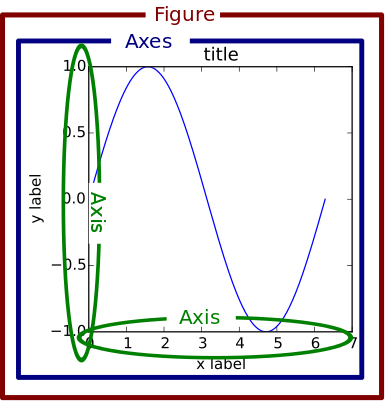)

2.   Figure
>*   Create a new figure, or activate an existing figure.
>>[matplotlib.pyplot.figure()](https://matplotlib.org/stable/api/_as_gen/matplotlib.pyplot.figure.html)
>
>*   Add a centered suptitle to the figure.
>>[matplotlib.pyplot.suptitle()](https://matplotlib.org/stable/api/_as_gen/matplotlib.pyplot.suptitle.html)
>
>*   Adjust the padding between and around subplots.
>>[matplotlib.figure.Figure.tight_layout()](https://matplotlib.org/stable/api/figure_api.html#matplotlib.figure.Figure.tight_layout)
>
>*   If using a GUI backend with pyplot, display the figure window.
>>[matplotlib.figure.Figure.show()](https://matplotlib.org/stable/api/figure_api.html#matplotlib.figure.Figure.show)
>
>*   Save the current figure.
>>[matplotlib.figure.Figure.savefig()](https://matplotlib.org/stable/api/figure_api.html#matplotlib.figure.Figure.savefig)
>


3.   Axes
>*   Add an Axes to the figure as part of a subplot arrangement.
>>[matplotlib.figure.Figure.add_subplot()](https://matplotlib.org/stable/api/figure_api.html#matplotlib.figure.Figure.add_subplot)
>
>*   Configure the grid lines.
>>[matplotlib.axes.Axes.grid()](https://matplotlib.org/stable/api/_as_gen/matplotlib.axes.Axes.grid.html)
>
>*   Change the appearance of ticks, tick labels, and gridlines.
>>[matplotlib.axes.Axes.tick_params()](https://matplotlib.org/stable/api/_as_gen/matplotlib.axes.Axes.tick_params.html)
>
>*   Place a legend on the Axes.
>>[matplotlib.axes.Axes.legend()](https://matplotlib.org/stable/api/_as_gen/matplotlib.axes.Axes.legend.html)
>
>*   Set a title for the Axes.
>>[matplotlib.axes.Axes.set_title()](https://matplotlib.org/stable/api/_as_gen/matplotlib.axes.Axes.set_title.html)

4.   Axis
>*   Set the x-axis view limits.
>>[matplotlib.axes.Axes.set_xlim()](https://matplotlib.org/stable/api/_as_gen/matplotlib.axes.Axes.set_xlim.html)
>
>*   Set the y-axis view limits.
>>[matplotlib.axes.Axes.set_ylim()](https://matplotlib.org/stable/api/_as_gen/matplotlib.axes.Axes.set_ylim.html)
>
>*   Set the label for the x-axis.
>>[matplotlib.axes.Axes.set_xlabel()](https://matplotlib.org/stable/api/_as_gen/matplotlib.axes.Axes.set_xlabel.html)
>
>*   Set the label for the y-axis.
>>[matplotlib.axes.Axes.set_ylabel()](https://matplotlib.org/stable/api/_as_gen/matplotlib.axes.Axes.set_ylabel.html)
>
>*   Convenience method to get or set some axis properties.
>>[matplotlib.axes.Axes.axis()](https://matplotlib.org/stable/api/_as_gen/matplotlib.axes.Axes.axis.html)
>

0.3 matplotlib参照(2)；グラフ
1.   stem(幹）グラフ
>*  Create a stem plot.
>>[matplotlib.axes.Axes.stem()](https://matplotlib.org/stable/api/_as_gen/matplotlib.axes.Axes.stem.html)
>
2.   折れ線グラフ
>*  Plot y versus x as lines and/or markers.
>>[matplotlib.axes.Axes.plot()](https://matplotlib.org/stable/api/_as_gen/matplotlib.axes.Axes.plot.html)
>

# 1．基本的な離散時間信号

1.1 単位インパルス信号


> $
 \delta[n] = \left\{ \begin{array}{rr}
 1 & ( n = 0 ) \\
 0 & ( n \neq 0 )
 \end{array} \right.         
$

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

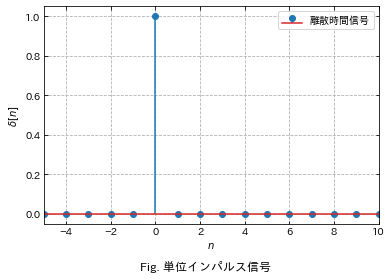

In [ ]:
import numpy as np                  # 数値計算ライブラリnumpyを別名npとして読み込み
import matplotlib.pyplot as plt     # グラフ描画ライブラリmatplotlib.pyplotを別名pltとして読み込み
import japanize_matplotlib          # matplot用日本語フォントを読み込み（要環境設定）
from google.colab import files      # ローカルファイルシステム関連

# 離散時間のデータ
n = np.array([-5, -4, -3, -2, -1, 0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10])
# 単位インパルス信号のデータ
delta = np.array([0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0])

# グラフ描画設定
fig_title = 'Fig. 単位インパルス信号'           # figureオブジェクトタイトル
fig = plt.figure()                              # figureオブジェクト(オブジェクト名=fig)作成
plt.suptitle(fig_title, x = 0.5, y = 0)         # figオブジェクト内の指定位置(中央下部)にタイトル表示
ax = fig.add_subplot(111)                       # figに属するAxesオブジェクト(オブジェクト名=ax)を1行1列1番目に作成
ax.grid(linestyle='--')                         # 目盛線(破線)
ax.tick_params(direction = "in", top = True, bottom = True, left = True, right = True)  # 目盛設定(向き；内側"in"か外側"out"かその両方"inout"か,上下左右各軸目盛あり)
ax.set_xlim(-5, 10)                             # 横軸(x軸)の目盛範囲
ax.set_ylim(auto = True)                        # 縦軸(y軸)の目盛範囲
ax.set_xlabel('$n$')                            # 横軸(x軸)のラベル
ax.set_ylabel('$\delta[n]$')                    # 横軸(x軸)のラベル
# グラフ描画
stem_label = '離散時間信号'                                         # グラフのラベル名
ax.stem(n, delta, label = stem_label, use_line_collection = True)   # stem(幹)グラフを描画
ax.legend(loc = 'upper right')                                      # 右上に凡例表示
# グラフの保存とダウンロード
savefilename = 'delta.png'       # 保存ファイル名
fig.savefig(savefilename)       # グラフの保存
files.download(savefilename)    # 保存したファイルをローカルマシンに保存

1.2 単位ステップ信号


> $
 u[n] = \left\{ \begin{array}{rr}
 1 & ( n \geq 0 ) \\
 0 & ( n < 0 )
 \end{array} \right.         
$

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

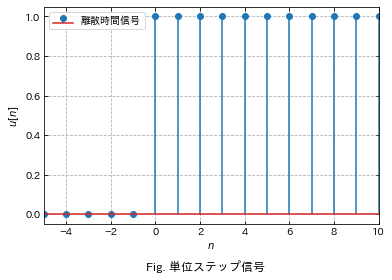

In [ ]:
import numpy as np                  # 数値計算ライブラリnumpyを別名npとして読み込み
import matplotlib.pyplot as plt     # グラフ描画ライブラリmatplotlib.pyplotを別名pltとして読み込み
import japanize_matplotlib          # matplot用日本語フォントを読み込み（要環境設定）
from google.colab import files      # ローカルファイルシステム関連

# 離散時間のデータ
n = np.array([-5, -4, -3, -2, -1, 0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10])
# 単位ステップ信号のデータ
unitstep = np.array([0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1])

# グラフ描画設定
fig_title = 'Fig. 単位ステップ信号'             # figureオブジェクトタイトル
fig = plt.figure()                              # figureオブジェクト(オブジェクト名=fig)作成
plt.suptitle(fig_title, x = 0.5, y = 0)         # figオブジェクト内の指定位置(中央下部)にタイトル表示
ax = fig.add_subplot(111)                       # figに属するAxesオブジェクト(オブジェクト名=ax)を1行1列1番目に作成
ax.grid(linestyle='--')                         # 目盛線(破線)
ax.tick_params(direction = "in", top = True, bottom = True, left = True, right = True)  # 目盛設定(向き；内側"in"か外側"out"かその両方"inout"か,上下左右各軸目盛あり)
ax.set_xlim(-5, 10)                             # 横軸(x軸)の目盛範囲
ax.set_ylim(auto = True)                        # 縦軸(y軸)の目盛範囲
ax.set_xlabel('$n$')                            # 横軸(x軸)のラベル
ax.set_ylabel('$u[n]$')                         # 横軸(x軸)のラベル
# グラフ描画
stem_label = '離散時間信号'                                             # グラフのラベル名
ax.stem(n, unitstep, label = stem_label, use_line_collection = True)    # stem(幹)グラフを描画
ax.legend()                                                             # 凡例表示(auto)
# グラフの保存とダウンロード
savefilename = 'step.png'       # 保存ファイル名
fig.savefig(savefilename)       # グラフの保存
files.download(savefilename)    # 保存したファイルをローカルマシンに保存

1.3 正弦波信号


> $
 y[n] = A \, sin ( \omega\,^{\prime} n + \theta )
$

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

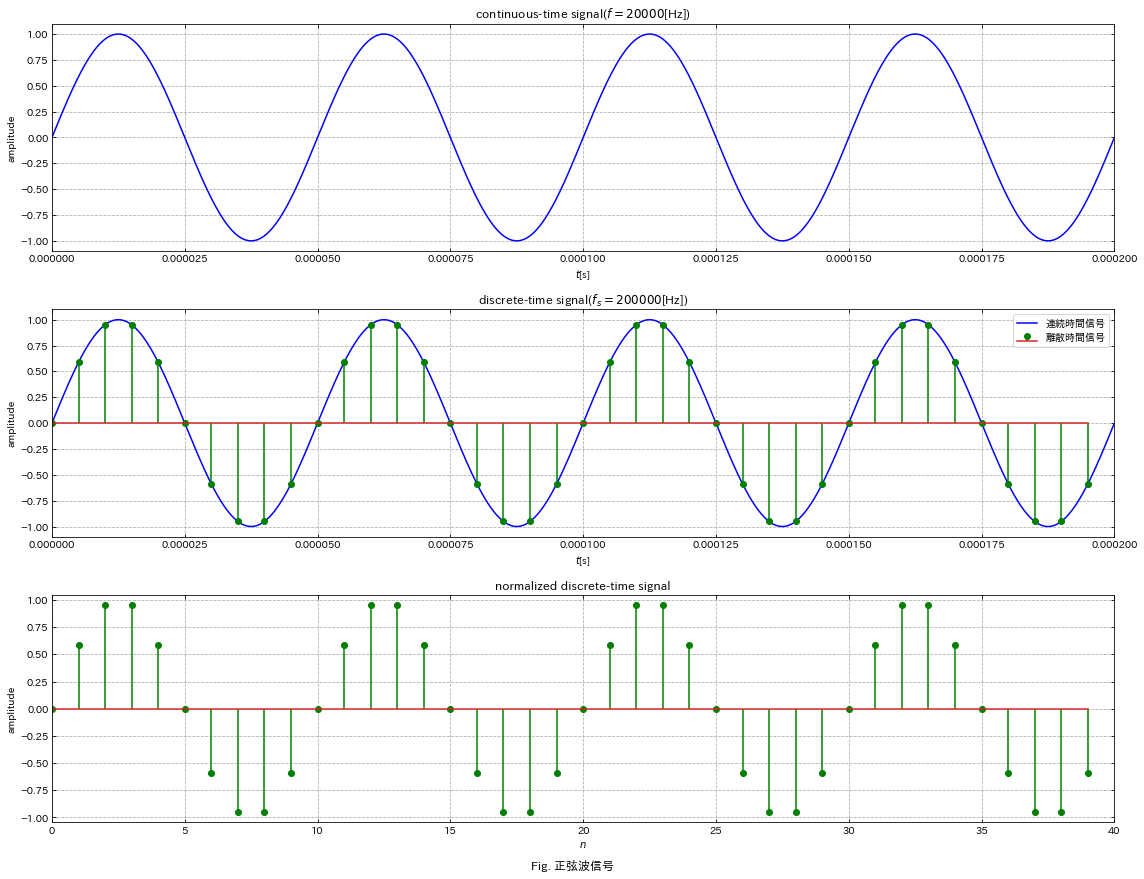

In [ ]:
import numpy as np                  # 数値計算ライブラリnumpyを別名npとして読み込み
import matplotlib.pyplot as plt     # グラフ描画ライブラリmatplotlib.pyplotを別名pltとして読み込み
import japanize_matplotlib          # matplot用日本語フォントを読み込み（要環境設定）
from google.colab import files      # ローカルファイルシステム関連

# 連続時間信号パラメータ
signal_amp = 1.0                            # 信号波の振幅 -> 1.0
signal_freq = 20e3                          # 信号波の周波数[Hz] -> 20 kHz 
signal_phi = 0.0                            # 信号波の初期位相[deg] -> 0 deg
duration = 0.2e-3                           # 信号の期間[s] -> 0.2 ms
sample_rate4cnt = 1/ (duration / (2**12))   # 連続時間信号描画用サンプリング・レート[Hz] -> 細かくすること（分解能12ビット）で描画上ほぼ連続
# 正弦波信号（連続時間）のデータ
t = np.arange(0, duration, 1 / sample_rate4cnt)                                                 # 時間のデータ
signal_cnt = signal_amp * np.sin(2.0 * np.pi * signal_freq * t + signal_phi / 180.0 * np.pi)    # 連続時間正弦波信号

# 離散時間信号パラメータ
sample_freq = 200e3                         # サンプリング周波数[Hz] -> 200 kHz
n_nend = duration * sample_freq             # 信号の期間の最後のデータ位置
# 正弦波信号（離散時間）のデータ
n = np.arange(0, duration, 1/ sample_freq)                                                      # 時間のデータ
signal_dis = signal_amp * np.sin(2.0 * np.pi * signal_freq * n + signal_phi / 180.0 * np.pi)    # 離散時間正弦波信号
n_n = n * sample_freq                                                                           # 時間のデータ(正規化)

# グラフ描画設定
fig_title = 'Fig. 正弦波信号'                                       # figureオブジェクトタイトル
fig = plt.figure(figsize = (16, 12))                                # figureオブジェクト(オブジェクト名=fig)作成，サイズ指定あり
fig.suptitle(fig_title, x = 0.5, y = 0)                             # figオブジェクト内の指定位置(中央下部)にタイトル表示
## 連続時間正弦波信号(グラフ描画設定)
ax1 = fig.add_subplot(311)                                          # figに属するAxesオブジェクト(オブジェクト名=ax1)を3行1列1番目に作成
ax1.grid(linestyle='--')                                            # 目盛線(破線)
ax1.tick_params(direction = "in", top = True, bottom = True, left = True, right = True)  # 目盛設定(向き；内側"in"か外側"out"かその両方"inout"か,上下左右各軸目盛あり)
ax1.set_xlim(0, duration)                                           # 横軸(x軸)の目盛範囲
ax1.set_ylim(auto = True)                                           # 縦軸(y軸)の目盛範囲
ax1.set_xlabel('$t$[s]')                                            # 横軸(x軸)のラベル
ax1.set_ylabel('amplitude')                                         # 縦軸(y軸)のラベル
ax1_title = 'continuous-time signal($f = %.0f$[Hz])'%(signal_freq)  # ax1オブジェクトタイトル
ax1.set_title(ax1_title)                                            # グラフタイトル
## 連続時間正弦波信号(グラフ描画)
ax1.plot(t, signal_cnt, 'b')                                        # 折れ線グラフを描画
## 離散時間正弦波信号(グラフ描画設定)
ax2 = fig.add_subplot(312)                                          # figに属するAxesオブジェクト(オブジェクト名=ax2)を3行1列2番目に作成
ax2.grid(linestyle='--')                                            # 目盛線(破線)
ax2.tick_params(direction = "in", top = True, bottom = True, left = True, right = True)  # 目盛設定(向き；内側"in"か外側"out"かその両方"inout"か,上下左右各軸目盛あり)
ax2.set_xlim(0, duration)                                           # 横軸(x軸)の目盛範囲
ax2.set_ylim(auto = True)                                           # 縦軸(y軸)の目盛範囲
ax2.set_xlabel('$t$[s]')                                            # 横軸(x軸)のラベル
ax2.set_ylabel('amplitude')                                         # 縦軸(y軸)のラベル
ax2_title = 'discrete-time signal($f_s = %.0f$[Hz])'%(sample_freq)  # ax2オブジェクトタイトル
ax2.set_title(ax2_title)                                            # グラフタイトル
## 離散時間正弦波信号(グラフ描画)
plot_label = '連続時間信号'                                         # グラフのラベル名
stem_label = '離散時間信号'                                         # グラフのラベル名
ax2.plot(t, signal_cnt, 'b', label = plot_label)                    # 折れ線グラフを描画
ax2.stem(n, signal_dis, linefmt = 'g', markerfmt ='go', label = stem_label, use_line_collection = True) # stem(幹)グラフを描画
ax2.legend()                                                        # 凡例表示(auto)
## 正規化離散時間正弦波信号(グラフ描画設定)
ax3 = fig.add_subplot(313)                                          # figに属するAxesオブジェクト(オブジェクト名=ax3)を3行1列3番目に作成
ax3.grid(linestyle='--')                                            # 目盛線(破線)
ax3.tick_params(direction = "in", top = True, bottom = True, left = True, right = True)  # 目盛設定(向き；内側"in"か外側"out"かその両方"inout"か,上下左右各軸目盛あり)
ax3.set_xlim(0, n_nend)                                             # 横軸(x軸)の目盛範囲
ax3.set_ylim(auto = True)                                           # 縦軸(y軸)の目盛範囲
ax3.set_xlabel('$n$')                                               # 横軸(x軸)のラベル
ax3.set_ylabel('amplitude')                                         # 縦軸(y軸)のラベル
ax3_title = 'normalized discrete-time signal'                       # ax3オブジェクトタイトル
ax3.set_title(ax3_title)                                            # グラフタイトル
## 正規化離散時間正弦波信号(グラフ描画)
ax3.stem(n_n, signal_dis, linefmt= 'g', markerfmt='go', use_line_collection = True) # stem(幹)グラフを描画
# グラフ描画再設定
fig.tight_layout()              # グラフ描画領域が重複しないようにレイアウト調整
fig.show()                      # すべてのfigオブジェクトを表示
# グラフの保存とダウンロード
savefilename = 'sin_wave.png'   # 保存ファイル名
fig.savefig(savefilename)       # グラフの保存
files.download(savefilename)    # 保存したファイルをローカルマシンに保存

## 課題1

>10 kHzの正弦波信号を以下の条件によるサンプリングを行ったときの正規化離散時間信号の波形を作成しなさい。
>
>＜条件＞
>
>　・ 出席番号を$x$とするとき，サンプリング周波数$f_s=10x+100$ [kHz]とする。
>
>　・ 時間の期間（データ数）や正弦波信号の振幅・初期位相は任意とする。




# 2．極と零点

システムの伝達関数$H(z)$は，入力$X(z)$と出力$Y(z)$を用いて次式で表される。

> $H(z) = \frac{X(z)}{Y(z)} $

$H(z)=0$となる$z$の値を零点(zero)，$H(z)=\infty$となる$z$の値を極(pole)という。

すべての極が複素単位円の内部（境界は含まない）であれば，システムは安定する。


（例）以下の伝達関数$H(z)$の零点と極を求め，複素数平面上に配置を図示しなさい。

　$H(z)=\frac{X(z)}{Y(z)}=\frac{1+2z^{-1}+z^{-2}}{1-z^{-1}+0.75z^{-2}}=\frac{z^2+2z+1}{z^2-z+0.75}$

zero =  [-1. -1.]
pole =  [0.5+0.70710678j 0.5-0.70710678j]


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

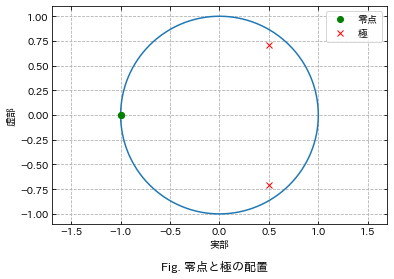

In [ ]:
import numpy as np                  # 数値計算ライブラリnumpyを別名npとして読み込み
import matplotlib.pyplot as plt     # グラフ描画ライブラリmatplotlib.pyplotを別名pltとして読み込み
import japanize_matplotlib          # matplot用日本語フォントを読み込み（要環境設定）
from google.colab import files      # ローカルファイルシステム関連

# 伝達関数
xz = np.array([1, 2, 1])            # 分子の係数
yz = np.array([1, -1, 0.75])        # 分母の係数
# 零点
zero = np.roots(xz)                 # 零点の計算(xzの根)
print('zero = ', zero)              # 零点の結果出力
# 極
pole = np.roots(yz)                 # 極の計算(yzの極)
print('pole = ', pole)              # 極の結果出力

# グラフ描画設定
fig_title = 'Fig. 零点と極の配置'               # figureオブジェクトタイトル
fig = plt.figure()                              # figureオブジェクト(オブジェクト名=fig)作成
plt.suptitle(fig_title, x = 0.5, y = 0)         # figオブジェクト内の指定位置(中央下部)にタイトル表示
ax = fig.add_subplot(111)                       # figに属するAxesオブジェクト(オブジェクト名=ax)を1行1列1番目に作成
ax.grid(linestyle='--')                         # 目盛線(破線)
ax.tick_params(direction = "in", top = True, bottom = True, left = True, right = True)  # 目盛設定(向き；内側"in"か外側"out"かその両方"inout"か,上下左右各軸目盛あり)
ax.set_xlim(auto = True)                        # 横軸(x軸)の目盛範囲
ax.set_ylim(auto = True)                        # 縦軸(y軸)の目盛範囲
ax.set_xlabel('実部')                           # 横軸(x軸)のラベル
ax.set_ylabel('虚部')                           # 横軸(x軸)のラベル
ax.axis('equal')                                # 軸の設定(両軸のスケールが等しい)
# グラフ描画
__theta = np.linspace(-np.pi, np.pi, 2**10, endpoint = False)    
uc = np.exp(1j * __theta)                                       # 単位円のデータ計算
ax.plot(np.real(uc), np.imag(uc), '-')                          # 単位円の描画
ax.plot(np.real(zero), np.imag(zero), 'go', label ='零点')      # 零点の描画
ax.plot(np.real(pole), np.imag(pole), 'rx', label ='極')        # 極の描画
ax.legend()                                                     # 凡例表示(auto)
# グラフの保存とダウンロード
savefilename = 'zero_pole.png'      # 保存ファイル名
fig.savefig(savefilename)           # グラフの保存
files.download(savefilename)        # 保存したファイルをローカルマシンに保存

## 課題2

>伝達関数$H(z)$が以下の式および条件で与えられるとき，零点および極を求め，複素数平面上に図示しなさい。
>
> $H(z) = \frac{a+bz^{-1}}{1+cz^{-1}+dz^{-2}} $
>
>＜条件＞
>
>　・ 出席番号の10の位の数を$x$，1の位の数を$y$としたとき，定数$a$，$b$，$c$，$d$を以下のとおりとする。
>
>　　$a = x$，$b = y$，$c = x + y$，$d = x - y$
>
>（例）出席番号が1番の場合：$x = 0$，$y = 1$
>
>　　$a = x = 0$，　$b = y = 1$，　$c = x + y = 0 + 1 = 1$，　$d = x - y = 0 - 1 = -1 $
>
>（例）出席番号が51番の場合：$x = 5$，$y = 1$
>
>　　$a = x = 5$，　$b = y = 1$，　$c = x + y = 5 + 1 = 6$，　$d = x - y = 5 - 1 = 4 $

# 3．高速フーリエ変換

以下の信号$x(t)$の高速フーリエ変換を行う。

> $
 x(t) = A_1sin(2 \pi f_1 t) + A_2sin(2 \pi f_2 t) + A_3sin(2 \pi f_3 t)   
$

3つの周波数成分をもつ信号であり，
> $
 A_1 = 1.0 , f_1 = 10$[Hz]$ ,  A_2 = 0.5 ,  f_2 = 20$[Hz]$ ,  A_3 = 0.8 , f_3 = 40$[Hz]


としたときの高速フーリエ変換をし，スペクトルを図示する。

ここで，サンプリング周波数は，
$f_s = 100$[Hz]としており，データ数$N=2^8$としている。

また，この信号にランダムノイズを付加したときの高速フーリエ変換をし，スペクトルを図示する。

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

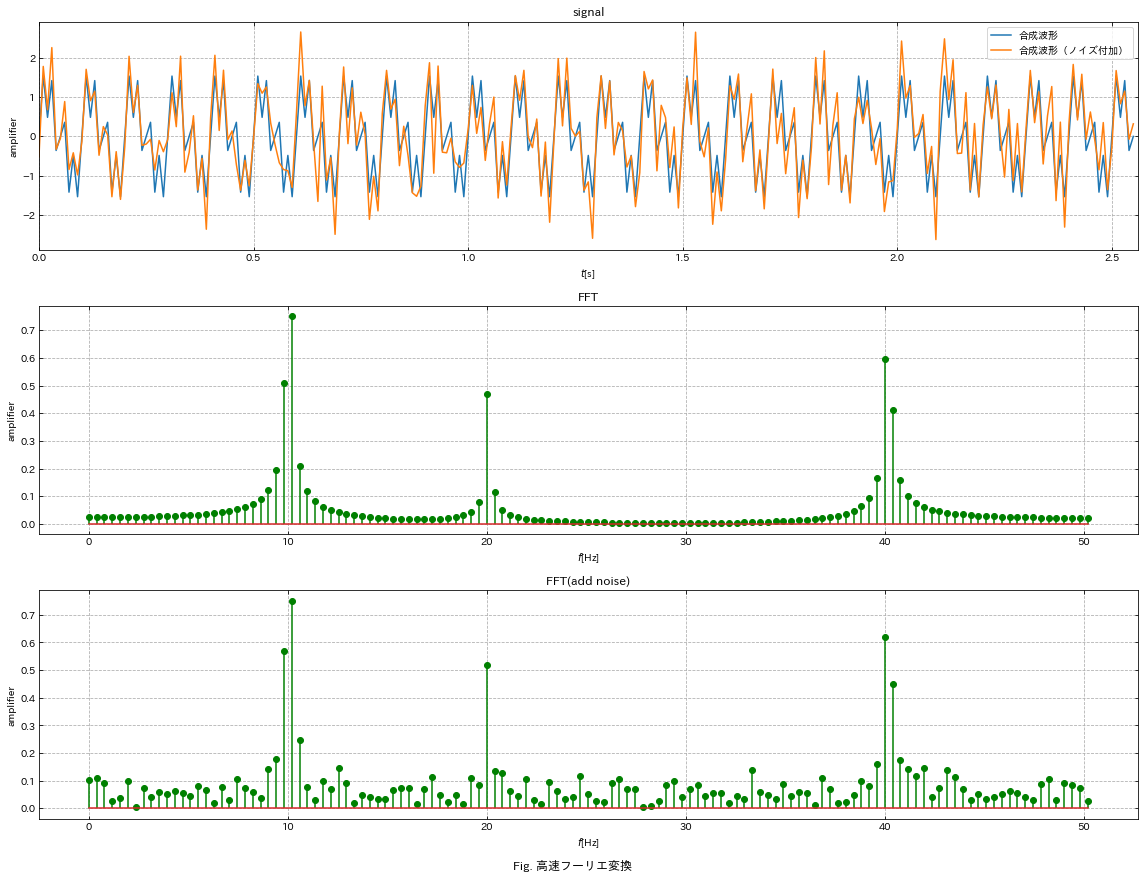

In [ ]:
import numpy as np                  # 数値計算ライブラリnumpyを別名npとして読み込み
import matplotlib.pyplot as plt     # グラフ描画ライブラリmatplotlib.pyplotを別名pltとして読み込み
import japanize_matplotlib          # matplot用日本語フォントを読み込み（要環境設定）
from google.colab import files      # ローカルファイルシステム関連

# 設定
N = 2 ** 8          # データ数
fs = 100            # サンプリング周波数[Hz]
Ts = 1 / fs         # サンプリング周期[s]
f1 = 10; A1 = 1.0   # 正弦波信号1の周波数と振幅
f2 = 20; A2 = 0.5   # 正弦波信号2の周波数と振幅
f3 = 40; A3 = 0.8   # 正弦波信号3の周波数と振幅

# 時間データ
t = np.arange(0, N * Ts, Ts)

# 信号データ
x1 = A1 * np.sin(2 * np.pi * f1 * t)    # 正弦波信号1
x2 = A2 * np.sin(2 * np.pi * f2 * t)    # 正弦波信号2
x3 = A3 * np.sin(2 * np.pi * f3 * t)    # 正弦波信号3
## ノイズ
### 標準正規分布による乱数
noise = np.random.normal(loc = 0, scale = 0.50, size = N)   # loc（平均），scale(標準偏差）
## 合成波形
x0 = x1 +x2 +x3     # 合成波形
x = x0 + noise      # 合成波形（ノイズ付加）

# FFT
F0 = np.fft.fft(x0)
F = np.fft.fft(x)

# 周波数スペクトル
## 振幅
amp0 = 2 * np.abs(F0) / N
amp = 2 * np.abs(F) / N
## 周波数
freq = np.linspace(0, fs, N)

# グラフ描画設定
fig_title = 'Fig. 高速フーリエ変換'             # figureオブジェクトタイトル
fig = plt.figure(figsize = (16, 12))            # figureオブジェクト(オブジェクト名=fig)作成，サイズ指定あり
plt.suptitle(fig_title, x = 0.5, y = 0)         # figオブジェクト内の指定位置(中央下部)にタイトル表示
## 時間領域信号（グラフ描画設定）
ax1 = fig.add_subplot(311)                      # figに属するAxesオブジェクト(オブジェクト名=ax1)を3行1列1番目に作成
ax1.grid(linestyle='--')                        # 目盛線(破線)
ax1.tick_params(direction = "in", top = True, bottom = True, left = True, right = True) # 目盛設定(向き；内側"in"か外側"out"かその両方"inout"か,上下左右各軸目盛あり)
ax1.set_xlim(xmin = 0, xmax= N * Ts)            # 横軸(x軸)の目盛範囲
ax1.set_ylim(auto = True)                       # 縦軸(y軸)の目盛範囲
ax1.set_xlabel('$t$[s]')                        # 横軸(x軸)のラベル
ax1.set_ylabel('amplifier')                     # 横軸(x軸)のラベル
ax1_title = 'signal'                            # ax1オブジェクトタイトル
ax1.set_title(ax1_title)                        # グラフタイトル
## 時間領域信号（グラフ描画）
ax1_label0 = '合成波形'                         # グラフのラベル名
ax1.plot(t, x0, label = ax1_label0)
ax1_label1 = '合成波形（ノイズ付加）'           # グラフのラベル名
ax1.plot(t, x, label = ax1_label1)
ax1.legend(loc = 'upper right')                 # 右上に凡例表示
## 振幅スペクトル（グラフ描画設定）
ax2 = fig.add_subplot(312)                      # figに属するAxesオブジェクト(オブジェクト名=ax2)を3行1列2番目に作成
ax2.grid(linestyle='--')                        # 目盛線(破線)
ax2.tick_params(direction = "in", top = True, bottom = True, left = True, right = True) # 目盛設定(向き；内側"in"か外側"out"かその両方"inout"か,上下左右各軸目盛あり)
ax2.set_xlim(auto = True)                       # 横軸(x軸)の目盛範囲
ax2.set_ylim(auto = True)                       # 縦軸(y軸)の目盛範囲
ax2.set_xlabel('$f$[Hz]')                       # 横軸(x軸)のラベル
ax2.set_ylabel('amplifier')                     # 横軸(x軸)のラベル
ax2_title = 'FFT'                               # ax2オブジェクトタイトル
ax2.set_title(ax2_title)                        # グラフタイトル
## 振幅スペクトル（グラフ描画）
#ax2.stem(freq, amp, linefmt= 'g', markerfmt='go', use_line_collection = True)                              # stem(幹)グラフを描画（全体）
ax2.stem(freq[:int(N/2)+1], amp0[:int(N/2)+1], linefmt= 'g', markerfmt='go', use_line_collection = True)    # stem(幹)グラフを描画（正の周波数領域のみ）
## ノイズ付加時の振幅スペクトル（グラフ描画設定）
ax3 = fig.add_subplot(313)                      # figに属するAxesオブジェクト(オブジェクト名=ax3)を3行1列3番目に作成
ax3.grid(linestyle='--')                        # 目盛線(破線)
ax3.tick_params(direction = "in", top = True, bottom = True, left = True, right = True)  # 目盛設定(向き；内側"in"か外側"out"かその両方"inout"か,上下左右各軸目盛あり)
ax3.set_xlim(auto = True)                       # 横軸(x軸)の目盛範囲
ax3.set_ylim(auto = True)                       # 縦軸(y軸)の目盛範囲
ax3.set_xlabel('$f$[Hz]')                       # 横軸(x軸)のラベル
ax3.set_ylabel('amplifier')                     # 横軸(x軸)のラベル
ax3_title = 'FFT(add noise)'                    # ax3オブジェクトタイトル
ax3.set_title(ax3_title)                        # グラフタイトル
## ノイズ付加時の振幅スペクトル（グラフ描画）
ax3.stem(freq[:int(N/2)+1], amp[:int(N/2)+1], linefmt= 'g', markerfmt='go', use_line_collection = True)     # stem(幹)グラフを描画

# グラフ描画再設定
fig.tight_layout()              # グラフ描画領域が重複しないようにレイアウト調整
fig.show()                      # すべてのfigオブジェクトを表示

# グラフの保存とダウンロード
savefilename = 'fft.png'        # 保存ファイル名
fig.savefig(savefilename)       # グラフの保存
files.download(savefilename)    # 保存したファイルをローカルマシンに保存

## 課題3


> $
 x(t) = A_1sin(2 \pi f_1 t) + A_2sin(2 \pi f_2 t) + A_3sin(2 \pi f_3 t)   
$

3つの周波数成分をもつ入力信号おいて，
> $
A_1 = 1.0 , f_1 = 10$[Hz]$ ,  A_2 = x ,  f_2 = 80$[Hz]$ ,  A_3 = 0.8 , f_3 = 40$[Hz]


としたときの高速フーリエ変換をする。

ここで，サンプリング周波数$f_s = 100$[Hz]とし，データ数$N=2^8$とする。


---



(1) $x = 0.1 * 出席番号$として，振幅スペクトルを図示しなさい。

　このとき，所望する周波数成分のスペクトルが得られているか考察しなさい。

(2) $x = 0.1 * 出席番号, f_2 = 20$[Hz]とし，標準正規分布による乱数で生成したノイズを付加したときに振幅スペクトルを図示しなさい。

　ただし，標準正規分布による乱数において，標準偏差を$0.5+0.1*x$とする。

　なお，他の値は，3．高速フーリエ変換で示している値とする。

# 4．高速フーリエ変換の利用(1)

任意のwavファイル（音声データ）における高速フーリエ変換を行う。

ローカルマシンに保存されているwavファイルをGoogle Colaboratoryに取り込む。

In [2]:
from google.colab import files
wav_file = files.upload()

Saving FS-1010-01.wav to FS-1010-01.wav


取り込んだwavファイルについて，高速フーリエ変換を行う。
ここでは，例として a_1.wav というファイルを使用したとする。

【処理内容】

・ wavファイルを読み込む

・ データ数$N=2^n$となるようにデータを切り出す

・ 高速フーリエ変換を行い，振幅スペクトルを図示する。

【要設定項目】

・ 7行目のwavファイルを各自のものに合わせる。

・ 50～51行目をデータ数に合わせて調整する。

・ 99行目のxmaxの値を任意に調整する。

（音声の場合は低い周波数の帯域にスペクトルが集中します。もとの値はサンプリング定理に基づいて$f_s/2$としています。）

channel            :  1
sample rate[Hz]    :  44100
sample width[bytes]:  2
frame number       :  13078
time[sec]          :  0.2965532879818594
log2(frame number) :  13.67485430794662


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

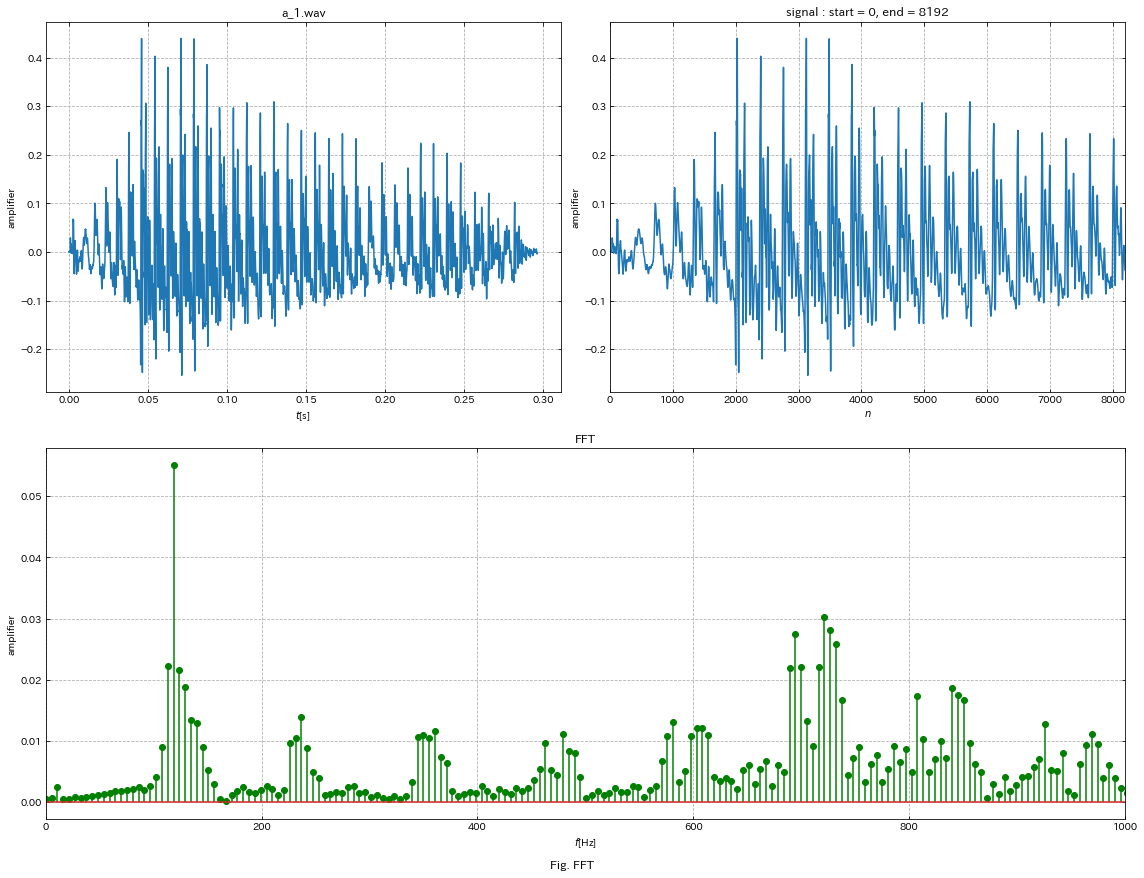

In [ ]:
import wave
import numpy as np
import matplotlib.pyplot as plt
import japanize_matplotlib          # matplot用日本語フォントを読み込み（要環境設定）
from google.colab import files      # ローカルファイルシステム関連

filename = "a_1.wav"                        # wavファイルを指定する
wav_file = wave.open(filename , "r" )       # wavファイルを読み込み

# wavファイルの情報取得・表示
nchannels = wav_file.getnchannels() # オーディオチャンネル数（1:モノラル,2:ステレオ）
framerate = wav_file.getframerate() # サンプリングレート（サンプリング周波数）．音楽CDの場合は44100 Hz
sampwidth = wav_file.getsampwidth() # 1サンプルあたりのバイト数（振幅に相当）
nframes = wav_file.getnframes()     # データの個数
print("channel            : ", nchannels)          
print("sample rate[Hz]    : ", framerate)    
print("sample width[bytes]: ", sampwidth) 
print("frame number       : ", nframes)           
print("time[sec]          : ", nframes / framerate)
print("log2(frame number) : ", np.log2(nframes))

# すべてのフレームを読み込む
buf = wav_file.readframes(wav_file.getnframes())    # 全フレーム読み込み

wav_file.close()

# データ
## データ変換
if sampwidth == 2:
    rdata = np.frombuffer(buf, dtype="int16")    # 2バイト=16ビットで1データとなるように変換
    rdata = rdata / (2**16)                       # 正規化（-1~1)
elif sampwidth == 4:
    rdata = np.frombuffer(buf, dtype="int32")    # 3バイト=32ビットで1データとなるように変換
    rdata = rdata / (2**32)                       # 正規化（-1~1)
## データ取り出し
### モノラルのときはそのまま
if nchannels == 1:
    data = rdata
### ステレオのときは左右のどちらかを選択
elif nchannels == 2:
    l_channel = rdata[0::2]    # 左は偶数番目(0,2,4,...番目)を取り出す
    data = l_channel
    #r_channel = rdata[1::2]    # 右は奇数番目(1,3,5,...番目)を取り出す
    #data = r_channel

# 設定
fs = framerate      # サンプリング周波数[Hz]
Ts = 1 / fs         # サンプリング周期[s]
## データを2^n個（n=log2(N))切り出す
start = 0               # 切り出し開始位置
end = start + 2**13     # 切り出し終了位置，log2(frame number)の値を参考にして決めるとよい
N = end - start         # frame numberの値より小さくなるようにする

# 時間データ
t0 = np.arange(0, nframes * Ts, Ts)         # 読み込みデータ全体
t = np.arange(start, start + N * Ts, Ts);   # 切り出した範囲

# FFT
F = np.fft.fft(data[start:end])

# 振幅スペクトル
## 振幅
amp = 2 * np.abs(F) / N
## 周波数
freq = np.linspace(0, fs, N)

# グラフ描画設定
fig_title = 'Fig. FFT'             # figureオブジェクトタイトル
fig = plt.figure(figsize = (16, 12))            # figureオブジェクト(オブジェクト名=fig)作成，サイズ指定あり
plt.suptitle(fig_title, x = 0.5, y = 0)         # figオブジェクト内の指定位置(中央下部)にタイトル表示
## 時間領域信号_全体（グラフ描画設定）
ax1 = fig.add_subplot(221)                      # figに属するAxesオブジェクト(オブジェクト名=ax1)を2行2列1番目に作成
ax1.grid(linestyle='--')                        # 目盛線(破線)
ax1.tick_params(direction = "in", top = True, bottom = True, left = True, right = True) # 目盛設定(向き；内側"in"か外側"out"かその両方"inout"か,上下左右各軸目盛あり)
ax1.set_xlim(auto = True)                       # 横軸(x軸)の目盛範囲
ax1.set_ylim(auto = True)                       # 縦軸(y軸)の目盛範囲
ax1.set_xlabel('$t$[s]')                        # 横軸(x軸)のラベル
ax1.set_ylabel('amplifier')                     # 横軸(x軸)のラベル
ax1_title = filename                            # ax1オブジェクトタイトル
ax1.set_title(ax1_title)                        # グラフタイトル
## 時間領域信号_全体（グラフ描画）
ax1.plot(t0, data)
## 正規化表現時間領域信号_切り出し（グラフ描画設定）
ax2 = fig.add_subplot(222)                      # figに属するAxesオブジェクト(オブジェクト名=ax2)を2行2列2番目に作成
ax2.grid(linestyle='--')                        # 目盛線(破線)
ax2.tick_params(direction = "in", top = True, bottom = True, left = True, right = True) # 目盛設定(向き；内側"in"か外側"out"かその両方"inout"か,上下左右各軸目盛あり)
ax2.set_xlim(xmin = 0, xmax = N)                # 横軸(x軸)の目盛範囲
ax2.set_ylim(auto = True)                       # 縦軸(y軸)の目盛範囲
ax2.set_xlabel('$n$')                           # 横軸(x軸)のラベル
ax2.set_ylabel('amplifier')                     # 横軸(x軸)のラベル
ax2_title = 'signal : start = %d, end = %d' %(start, end)   # ax2オブジェクトタイトル
ax2.set_title(ax2_title)                        # グラフタイトル
## 正規化表現時間領域信号_切り出し（グラフ描画）
ax2.plot(data)
## 振幅スペクトル（グラフ描画設定）
ax3 = fig.add_subplot(212)                      # figに属するAxesオブジェクト(オブジェクト名=ax3)を2行1列2番目に作成
ax3.grid(linestyle='--')                        # 目盛線(破線)
ax3.tick_params(direction = "in", top = True, bottom = True, left = True, right = True) # 目盛設定(向き；内側"in"か外側"out"かその両方"inout"か,上下左右各軸目盛あり)
ax3.set_xlim(xmin = 0, xmax = fs/2)             # 横軸(x軸)の目盛範囲（注目したい周波数に合わせて任意の範囲を設定すること）
ax3.set_ylim(auto = True)                       # 縦軸(y軸)の目盛範囲
ax3.set_xlabel('$f$[Hz]')                       # 横軸(x軸)のラベル
ax3.set_ylabel('amplifier')                     # 横軸(x軸)のラベル
ax3_title = 'FFT'                               # ax3オブジェクトタイトル
ax3.set_title(ax3_title)                        # グラフタイトル
## 振幅スペクトル（グラフ描画）
ax3.stem(freq[:int(N/2)+1], amp[:int(N/2)+1], linefmt= 'g', markerfmt='go', use_line_collection = True)    # stem(幹)グラフを描画（正の周波数領域のみ）

# グラフ描画再設定
fig.tight_layout()              # グラフ描画領域が重複しないようにレイアウト調整
fig.show()                      # すべてのfigオブジェクトを表示

# グラフの保存とダウンロード
savefilename = filename + '.png'    # 保存ファイル名
fig.savefig(savefilename)           # グラフの保存
files.download(savefilename)        # 保存したファイルをローカルマシンに保存

## 課題4

4．高速フーリエ変換の利用(1)の内容について，
任意のwavファイル（数秒のものでよい）を準備し，高速フーリエ変換を行い，振幅スペクトルを図示しなさい。

ただし，他の学生と重複しないように注意すること。
（各自で録音したデータが望ましい。）

# 5．高速フーリエ変換の利用(2)

STFT（Short-Time Fourier Transform : 短時間フーリエ変換）とは，時系列データを細かく窓（フレーム）で区切ってFFTし，その窓を順次横にずらしながらFFTを繰り返していく解析方法です。

以下は時系列データからフレームでデータを切り出し、順次FFTしていくSTFTからスペクトログラムまでの過程を示す図です。
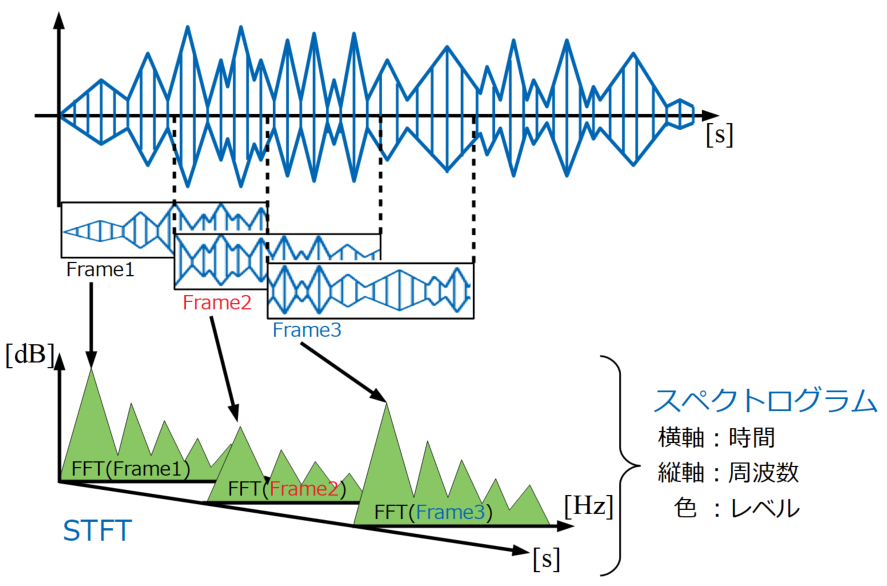

【引用】Pythonで音のSTFT計算を自作!スペクトログラム表示する方法，https://watlab-blog.com/2019/05/19/python-spectrogram/


取り込んだwavファイルについて，スペクトログラム表示を行う。
ここでは，例として FS-1010-01.wav というファイルを使用したとする。

【処理内容】

・ wavファイルを読み込む。

・ データ数$N=2^{12}$となるようにデータを切り出す。

・ 切り出したデータ（フレーム）に対して，窓関数をかける。

　（46行目で，ハニング窓をかけています。）

・ 各フレームにおいて，高速フーリエ変換($N=2^8$)を行い，スペクトログラム表示を行う。

【要設定項目】

・ 7行目のwavファイルを各自のものに合わせる。

・ 79～80行目を変更可能。

（$2^{12} * 1 / 44100 \fallingdotseq 0.09288$ なので約$0.1$秒ごとに切り出してFFTを行っています。） 

・ 62行目の値も変更可能。

（スペクトログラムはパワースペクトルでdB表示となります。そのため最小値は$-∞$となり，値をどこかで打ち切ります。）

channel            :  2
sample rate[Hz]    :  44100
frame number       :  2928240
time[sec]          :  66.4


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

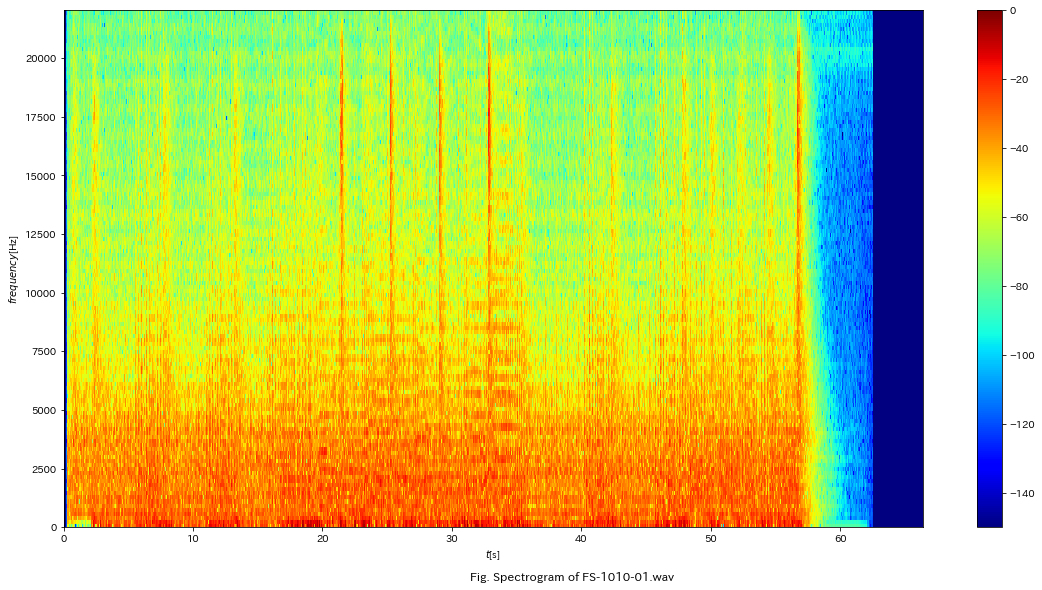

In [4]:
import wave
import numpy as np
import matplotlib.pyplot as plt
import japanize_matplotlib          # matplot用日本語フォントを読み込み（要環境設定）
from google.colab import files      # ローカルファイルシステム関連

filename = "FS-1010-01.wav"                 # wavファイルを指定する
wav_file = wave.open(filename , "r" )       # wavファイルを読み込み

# wavファイルの情報取得・表示
nchannels = wav_file.getnchannels() # オーディオチャンネル数（1:モノラル,2:ステレオ）
framerate = wav_file.getframerate() # サンプリングレート（サンプリング周波数）．音楽CDの場合は44100 Hz
sampwidth = wav_file.getsampwidth() # 1サンプルあたりのバイト数（振幅に相当）
nframes = wav_file.getnframes()     # データの個数
print("channel            : ", nchannels)          
print("sample rate[Hz]    : ", framerate)    
print("frame number       : ", nframes)           
print("time[sec]          : ", nframes / framerate)

# すべてのフレームを読み込む
buf = wav_file.readframes(wav_file.getnframes())    # 全フレーム読み込み

wav_file.close()

# データ
## データ変換
if sampwidth == 2:
    rdata = np.frombuffer(buf, dtype="int16")       # 2バイト=16ビットで1データとなるように変換
    rdata = rdata / (2**16)                         # 正規化（-1~1)
elif sampwidth == 4:
    rdata = np.frombuffer(buf, dtype="int32")       # 3バイト=32ビットで1データとなるように変換
    rdata = rdata / (2**32)                         # 正規化（-1~1)
## データ取り出し
### モノラルのときはそのまま
if nchannels == 1:
    data = rdata
### ステレオのときは左右のどちらかを選択
elif nchannels == 2:
    l_channel = rdata[0::2]     # 左は偶数番目(0,2,4,...番目)を取り出す
    data = l_channel
    #r_channel = rdata[1::2]    # 右は奇数番目(1,3,5,...番目)を取り出す
    #data = r_channel

def STFT(s, Lf, noverlap):
    if noverlap == None:
        noverlap = Lf//2
    l = s.shape[0]
    wf = np.hanning(Lf)                         # ハニング窓
    Mf = Lf//2 + 1
    Nf = int(np.ceil((l-noverlap)/(Lf-noverlap)))-1
    S = np.empty([Mf, Nf], dtype=np.complex128)
    for n in range(Nf):
        S[:,n] = np.fft.rfft(s[(Lf-noverlap)*n:(Lf-noverlap)*n+Lf] * wf, n=Lf, axis=0)
    return S

# plot spectrogram (fs: sampling frequency, s: signal(1D-array), Lf: length of frame(window), noverlap: number of overlap)
def plot_spectrogram(fs, s,  Lf, noverlap):
    S = STFT(s, Lf, noverlap)
    S = S + 1e-18
    P = 20 * np.log10(np.abs(S))
    P = P - np.max(P) # normalization
    vmin = -150
    m = np.linspace(0, s.shape[0]/fs, num=P.shape[1])
    k = np.linspace(0, fs/2, num=P.shape[0])
    fig_title = 'Fig. Spectrogram of ' + filename
    fig = plt.figure(figsize = (16, 8))
    plt.suptitle(fig_title, x = 0.5, y = 0)
    plt.pcolormesh(m, k, P, cmap = 'jet', vmin=-150, vmax=0)
    plt.xlabel('$t$[s]')
    plt.ylabel('$frequency$[Hz]')
    plt.colorbar()
    fig.tight_layout()
    fig.show()
    # グラフの保存とダウンロード
    savefilename = filename + '.png'    # 保存ファイル名
    fig.savefig(savefilename)           # グラフの保存
    files.download(savefilename)        # 保存したファイルをローカルマシンに保存

noverlap = None
framesize = 2 ** 8
plot_spectrogram(framerate, data, framesize, noverlap)


## 課題5

5．高速フーリエ変換の利用(2)の内容について，
任意のwavファイルを準備し，スペクトログラムを表示しなさい。

ただし，他の学生と重複しないように注意すること。

※ 各種設定可能な数値については，任意とします。

# 6．ディジタルフィルタ

画像のフィルタ処理は，画像検査を安定して精度よく行うために使用されます。
ノイズ除去，物体の輪郭強調，画像をぼかすなど様々な種類があります。

画像のフィルタ処理では，変換画素とその周辺画素を使用して変換する方式がよく使われます。
カーネルとは，この変換方式で使用する係数のことで，サイズは3x3画素，5x5画素，7x7画素などがあります。また，カーネルはマスク，フィルタなどと呼ばれることもあります。
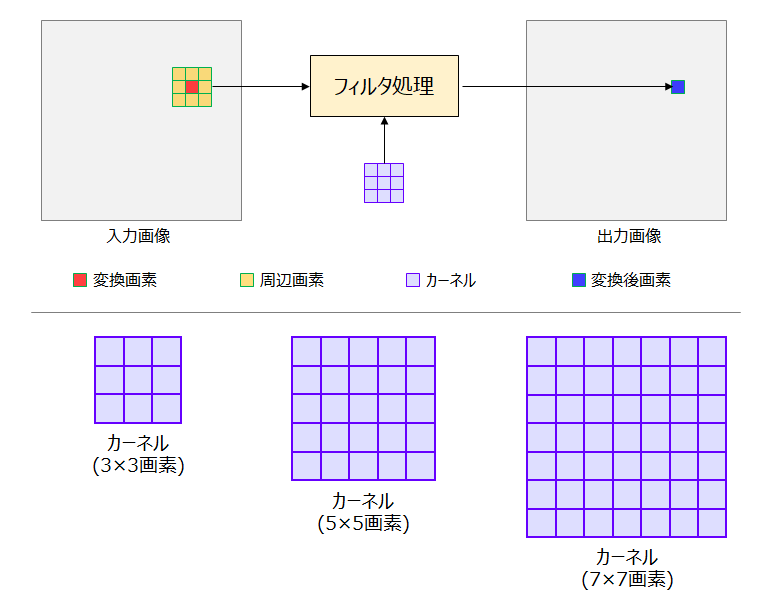

【引用】マクセルフロンティア株式会社，画像のフィルタ処理(カーネル)，https://www.frontier.maxell.co.jp/blog/posts/12.html

カーネル係数と入力画素を掛け算し，全て足し算した値（積和演算した値）が変換後の画素値となります。
この演算を画像の全画素に対して行います。

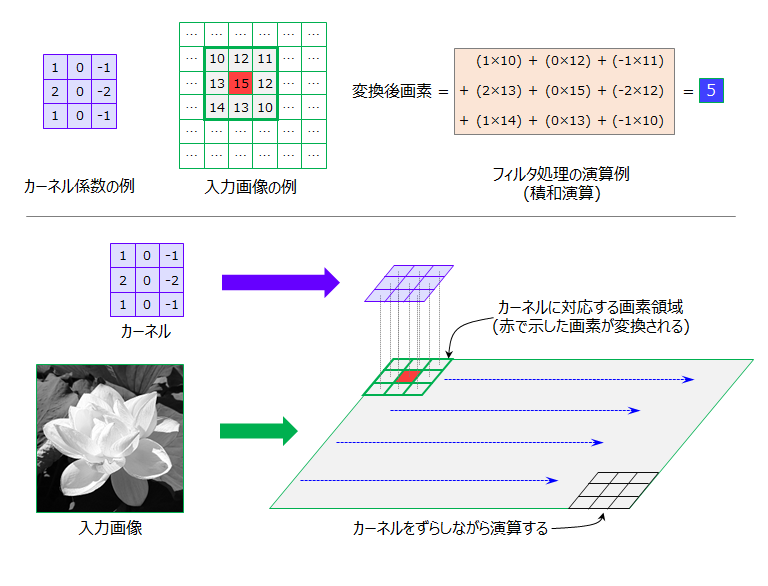

カーネルの係数を変更することで，様々なフィルタ処理が可能となります。


【引用】マクセルフロンティア株式会社，画像のフィルタ処理(カーネル)，https://www.frontier.maxell.co.jp/blog/posts/12.htmla

カーネルを，

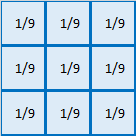

としたときのフィルタは，平均化フィルタといいます。  
平均化フィルタは，変換画素とその周辺の画素の9つの画素の平均を求めて，変換画素の画素値とするものである。



In [3]:
from google.colab import files
img_file = files.upload()

Saving 4.2.03.tiff to 4.2.03.tiff


size =  (512, 512)
画素値255の個数 ->  0
画素値0の個数 ->  33
PSNR（ノイズ付加画像）[dB] =  28.8036250254018
salt noise[%] = 0.2453
pepper noise[%] = 0.2178
salt & pepper noise[%] = 0.4631
PSNR（フィルタリング処理後画像）[dB] =  22.99882707746515


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

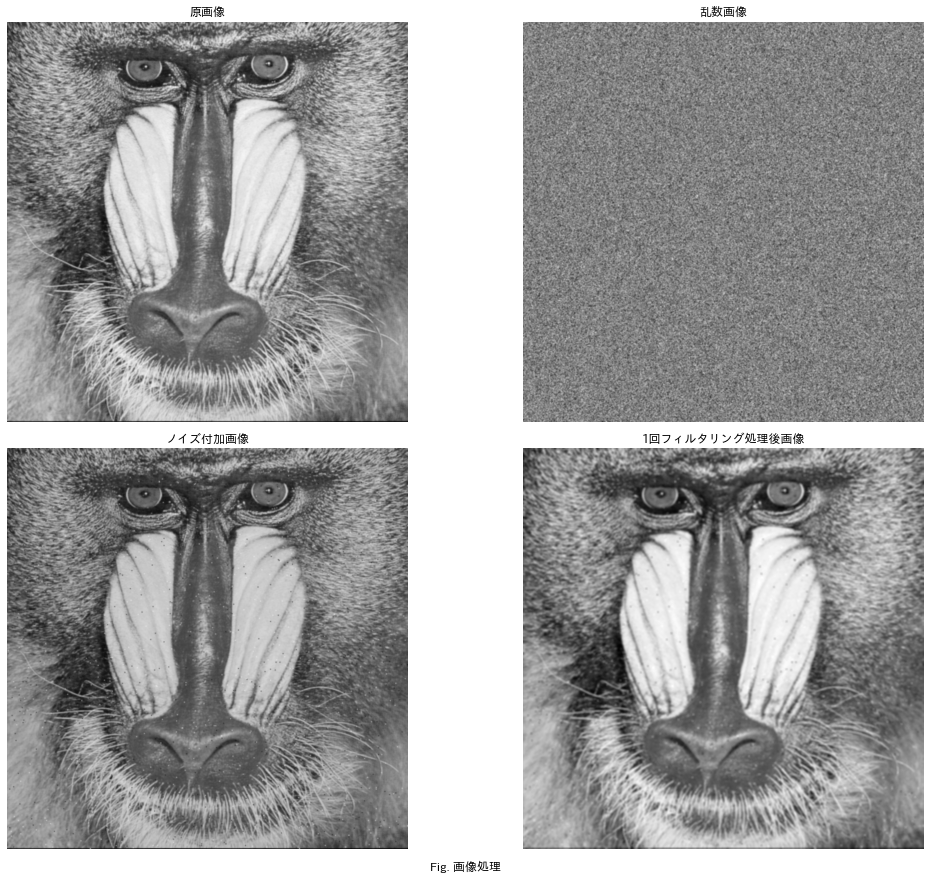

In [5]:
import cv2
import numpy as np
import matplotlib.pyplot as plt
import japanize_matplotlib          # matplot用日本語フォントを読み込み（要環境設定）
from google.colab import files      # ローカルファイルシステム関連

filename = '4.2.03.tiff'                                    # 画像ファイルを指定する
original_img = cv2.imread(filename , cv2.IMREAD_GRAYSCALE)  # 画像ファイルをグレイスケールで読み込み
print('size = ', original_img.shape)                        # 画像サイズ
data_n = original_img.shape[0] * original_img.shape[1]      # 画素数
#print('data_type : ', original_img.dtype)                  # uint8（符号なし8ビット）のデータであることの確認用
count_255 = np.count_nonzero(original_img == 255)           # 原画像における画素値255の画素数カウント
count_0 = np.count_nonzero(original_img == 0)               # 原画像における画素値0の画素数カウント
print('画素値255の個数 -> ', count_255)
print('画素値0の個数 -> ', count_0)

# カーネル(サイズ:3x3)
kernel = np.array([[1/9, 1/9, 1/9],
                   [1/9, 1/9, 1/9],
                   [1/9, 1/9, 1/9]])

# ノイズ付加のための準備
## 一様分布する乱数画像を生成
rnd_noise = np.zeros(original_img.shape, dtype=original_img.dtype)    # 乱数画像データ配列
mean = 128                      # 平均(正規分布のピークとなる位置, 2^8 / 2)
sd = 40                         # 標準偏差
cv2.randn(rnd_noise, mean, sd)  # 正規分布する乱数
# ノイズ付加
add_noise_img = original_img.copy()     # ノイズ付加後の画像データ（原画像に対してノイズを付加するために原画像をコピー）
th_high = 240      # 白ノイズ(salt noise)閾値0~255，大きくすると白ノイズ減少(255のとき白ノイズなし)
th_low = 15        # 黒ノイズ(pepper noise)閾値0~255，小さくすると黒ノイズ減少(0のとき黒ノイズなし)
## ゴマ塩ノイズ付加
add_noise_img[th_high < rnd_noise] = 255    # 原画像と乱数画像の各画素の値を比較し白ノイズ閾値より大きいときは白ノイズ付加
add_noise_img[rnd_noise < th_low] = 0       # 原画像と乱数画像の各画素の値を比較し黒ノイズ閾値より小さいときは黒ノイズ付加
print('PSNR（ノイズ付加画像）[dB] = ', cv2.PSNR(original_img, add_noise_img))
count_n255 = np.count_nonzero(add_noise_img == 255)         # ノイズ付加画像における画素値255の画素数カウント
count_n0 = np.count_nonzero(add_noise_img == 0)             # ノイズ付加画像における画素値0の画素数カウント
print('salt noise[%%] = %.4f' %((count_n255 - count_255) / data_n * 100))   # 付加した白ノイズの割合
print('pepper noise[%%] = %.4f' %((count_n0 - count_0) / data_n * 100))     # 付加した黒ノイズの割合
print('salt & pepper noise[%%] = %.4f' %((count_n255 - count_255 + count_n0 - count_0 ) / data_n * 100))    # 付加したごま塩ノイズの割合

# フィルタリング
## 処理回数
times_n = 1                 # 繰り返し回数
tmp_img = add_noise_img     # 繰り返し処理一時保存用
for i in  range(times_n):
    tmp_img =  cv2.filter2D(tmp_img, -1, kernel)    # フィルタリング処理
filtering_img = tmp_img
print('PSNR（フィルタリング処理後画像）[dB] = ', cv2.PSNR(original_img,filtering_img))

# 描画設定
fig_title = 'Fig. 画像処理'                     # figureオブジェクトタイトル
fig = plt.figure(figsize = (16, 12))            # figureオブジェクト(オブジェクト名=fig)作成，サイズ指定あり
plt.suptitle(fig_title, x = 0.5, y = 0)         # figオブジェクト内の指定位置(中央下部)にタイトル表示
## 原画像表示（設定）
ax1 = fig.add_subplot(221)                      # figに属するAxesオブジェクト(オブジェクト名=ax1)を2行2列1番目に作成
ax1.axis('off')                                 # 軸，目盛なし
ax1_title = '原画像'                            # ax1オブジェクトタイトル
ax1.set_title(ax1_title)                        # オブジェクトタイトル
## 原画像表示（描画）
ax1.imshow(original_img, cmap = 'gray', interpolation = 'bicubic')
## 乱数画像表示（設定）
ax2 = fig.add_subplot(222)                      # figに属するAxesオブジェクト(オブジェクト名=ax2)を2行2列2番目に作成
ax2.axis('off')                                 # 軸，目盛なし
ax2_title = '乱数画像'                          # ax2オブジェクトタイトル
ax2.set_title(ax2_title)                        # オブジェクトタイトル
## 乱数画像表示（描画）
ax2.imshow(rnd_noise, cmap = 'gray', interpolation = 'bicubic')
## 処理後画像表示（設定）
ax3 = fig.add_subplot(223)                      # figに属するAxesオブジェクト(オブジェクト名=ax3)を2行2列3番目に作成
ax3.axis('off')                                 # 軸，目盛なし
ax3_title = 'ノイズ付加画像'                    # ax3オブジェクトタイトル
ax3.set_title(ax3_title)                        # オブジェクトタイトル
## 処理後画像表示（描画）
ax3.imshow(add_noise_img, cmap = 'gray', interpolation = 'bicubic')
## 処理後画像表示（設定）
ax4 = fig.add_subplot(224)                      # figに属するAxesオブジェクト(オブジェクト名=ax4)を2行2列4番目に作成
ax4.axis('off')                                 # 軸，目盛なし
ax4_title = '%d回フィルタリング処理後画像'%(times_n)          # ax4オブジェクトタイトル
ax4.set_title(ax4_title)                        # オブジェクトタイトル
## 処理後画像表示（描画）
ax4.imshow(filtering_img, cmap = 'gray', interpolation = 'bicubic')

# グラフ描画再設定
fig.tight_layout()              # グラフ描画領域が重複しないようにレイアウト調整
fig.show()                      # すべてのfigオブジェクトを表示

# グラフの保存とダウンロード
savefilename = filename + '.png'    # 保存ファイル名
fig.savefig(savefilename)           # グラフの保存
files.download(savefilename)        # 保存したファイルをローカルマシンに保存


## 課題6

6.ディジタルフィルタの内容について， 任意の画像ファイルを準備し，ゴマ塩ノイズを付加したときの平均化フィルタの処理を行う。このとき，以下の内容について取り組みなさい。  
(1) PSNRとは何か，式を用いて説明しなさい。  
(2) ゴマ塩ノイズを付加した画像において，複数回の平均化フィルタ処理を行い，ノイズを除去できたと思われるときの結果（PSNR，平均化フィルタ処理の回数，処理画像）を示しなさい。また，複数回の平均化フィルタ処理により，どのようなことが画像に生じているか考察しなさい。

ただし，他の学生と画像が重複しないように注意すること。

※ 各種設定可能な数値（ノイズに関すること）については，任意とします。

## 課題7

任意の画像ファイルを準備し，以下のフィルタ処理を行う。

(1) 以下のカーネルにより，フィルタ処理を1回行ったとき，処理結果画像を示し，どのようなことを行うフィルタであるか考察しなさい。
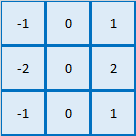

(2) 以下のカーネルにより，フィルタ処理を1回行ったとき，処理結果画像を示し，どのようなことを行うフィルタであるか考察しなさい。

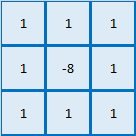

※いずれもノイズについては特に指定しない。（ノイズなしでも構わない）